# Exercise 12.1

In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.set_random_seed(seed)

W0715 13:15:06.365425 140454710937216 __init__.py:308] Limited tf.compat.v2.summary API due to missing TensorBoard installation.


I will load the data and preprocess.

In [32]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [33]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

In [34]:
# Consider an array of 5 labels out of a set of 3 classes {0, 1, 2}:
labels = np.array([0, 2, 1, 2, 0])
# `to_categorical` converts this into a matrix with as many columns as there are classes.
# The number of rows stays the same.
keras.utils.to_categorical(labels);

I define three functions in order to create, compile and fit the model.

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

In [18]:
def compile_model(optimizer):
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=optimizer(),
                  metrics=['accuracy'])
    return model

In [ ]:
def fit_model(model):
    # training parameters
    batch_size = 32
    epochs = 5
    # train DNN and store training info in history
    history = model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, Y_test))
    return history

I will fit with with six diffent optimizers.

In [20]:
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam


# sgd
model_SGD = compile_model(SGD)
history_SGD = fit_model(model_SGD)

# adam 
model_Adam = compile_model(Adam)
history_Adam = fit_model(model_Adam)

# nadam 
model_NAdam = compile_model(Nadam)
history_NAdam = fit_model(model_NAdam)

# adadelta 
model_Adadelta = compile_model(Adadelta)
history_Adadelta = fit_model(model_Adadelta)

# adagrad 
model_Adagrad = compile_model(Adagrad)
history_Adagrad = fit_model(model_Adagrad)

# adam 
model_RMSprop = compile_model(RMSprop)
history_RMSprop = fit_model(model_RMSprop)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 12s 206us/step - loss: 0.7576 - acc: 0.7795 - val_loss: 0.3101 - val_acc: 0.9149
Epoch 2/5
60000/60000 [==============================] - 13s 221us/step - loss: 0.3797 - acc: 0.8915 - val_loss: 0.2400 - val_acc: 0.9322
Epoch 3/5
60000/60000 [==============================] - 15s 242us/step - loss: 0.3053 - acc: 0.9133 - val_loss: 0.1988 - val_acc: 0.9431
Epoch 4/5
60000/60000 [==============================] - 16s 273us/step - loss: 0.2638 - acc: 0.9255 - val_loss: 0.1783 - val_acc: 0.9461
Epoch 5/5
60000/60000 [==============================] - 14s 234us/step - loss: 0.2312 - acc: 0.9355 - val_loss: 0.1572 - val_acc: 0.9517
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 21s 343us/step - loss: 0.2853 - acc: 0.9149 - val_loss: 0.1090 - val_acc: 0.9672
Epoch 2/5
60000/60000 [==============================] - 20s 341us/step 

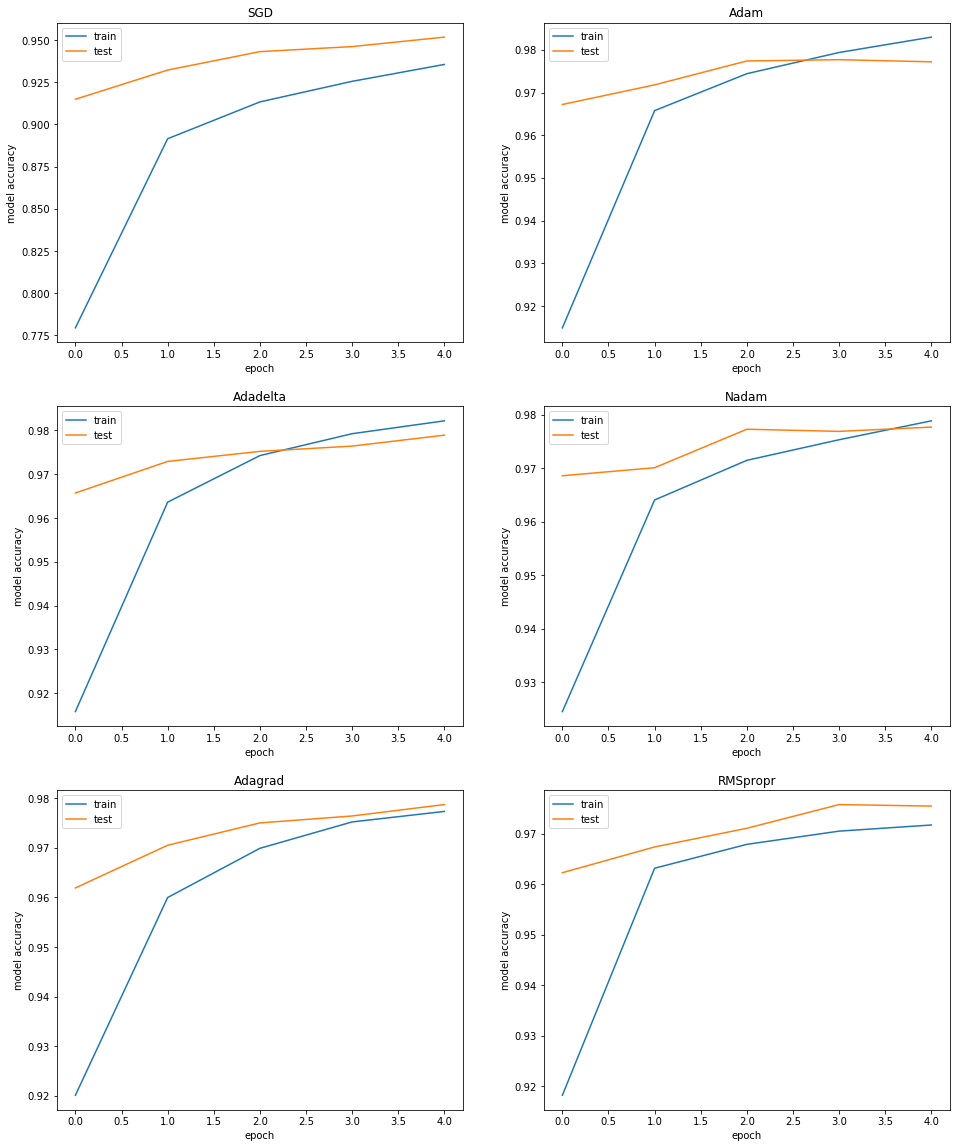

In [31]:
fig,ax = plt.subplots(3, 2, figsize=(16, 20))

# summarize history for accuracy
ax[0][0].plot(history_SGD.history['acc'])
ax[0][0].plot(history_SGD.history['val_acc'])
ax[0][0].set_title("SGD")
ax[0][0].set_ylabel('model accuracy')
ax[0][0].set_xlabel('epoch')
ax[0][0].legend(['train', 'test'])

ax[0][1].plot(history_Adam.history['acc'])
ax[0][1].plot(history_Adam.history['val_acc'])
ax[0][1].set_title("Adam")
ax[0][1].set_ylabel('model accuracy')
ax[0][1].set_xlabel('epoch')
ax[0][1].legend(['train', 'test'])

ax[1][0].plot(history_Adadelta.history['acc'])
ax[1][0].plot(history_Adadelta.history['val_acc'])
ax[1][0].set_title("Adadelta")
ax[1][0].set_ylabel('model accuracy')
ax[1][0].set_xlabel('epoch')
ax[1][0].legend(['train', 'test'])

ax[1][1].plot(history_NAdam.history['acc'])
ax[1][1].plot(history_NAdam.history['val_acc'])
ax[1][1].set_title("Nadam")
ax[1][1].set_ylabel('model accuracy')
ax[1][1].set_xlabel('epoch')
ax[1][1].legend(['train', 'test'])

ax[2][0].plot(history_Adagrad.history['acc'])
ax[2][0].plot(history_Adagrad.history['val_acc'])
ax[2][0].set_title("Adagrad")
ax[2][0].set_ylabel('model accuracy')
ax[2][0].set_xlabel('epoch')
ax[2][0].legend(['train', 'test'])

ax[2][1].plot(history_RMSprop.history['acc'])
ax[2][1].plot(history_RMSprop.history['val_acc'])
ax[2][1].set_title("RMSpropr")
ax[2][1].set_ylabel('model accuracy')
ax[2][1].set_xlabel('epoch')
ax[2][1].legend(['train', 'test'])
plt.show()

As expeted, the simple SGD is the worste performing optimizer. With Adam I have a strong suspect of overfitting, since the training accuracy becomes higher than the testing, with the last one stopping increasing (actually it starts decreasing...). Actually, I don't really like the trends of Adadelta and Nadam too. If I had to choose one model, I would pick Adagrad for sure (or I'd some dropout in the first layer, where there isn't).